# IMPORTANDO LIBRERIAS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('../Data/datos_seattle.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657 entries, 0 to 30656
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   30657 non-null  int64  
 1   datayear                        30657 non-null  int64  
 2   buildingname                    30657 non-null  object 
 3   buildingtype                    30657 non-null  object 
 4   taxparcelidentificationnumber   30657 non-null  object 
 5   address                         30657 non-null  object 
 6   city                            30657 non-null  object 
 7   state                           30657 non-null  object 
 8   zipcode                         30657 non-null  int64  
 9   latitude                        30657 non-null  float64
 10  longitude                       30657 non-null  float64
 11  neighborhood                    30657 non-null  object 
 12  councildistrictcode             

In [23]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

steamuse_kbtu                     96.552174
thirdlargestpropertyusetypegfa    78.706331
thirdlargestpropertyusetype       78.181166
secondlargestpropertyusetype      42.871122
secondlargestpropertyuse          42.871122
naturalgas_kbtu                   37.475944
naturalgas_therms                 37.475944
energystarscore                   25.958182
siteeuiwn_kbtu_sf                  3.937111
sourceeuiwn_kbtu_sf                3.937111
siteenergyusewn_kbtu               3.920801
siteeui_kbtu_sf                    2.925922
sourceeui_kbtu_sf                  2.925922
siteenergyuse_kbtu                 2.909613
electricity_kwh                    1.895163
electricity_kbtu                   1.891901
ghgemissionsintensity              1.630949
totalghgemissions                  1.624425
complianceissue                    1.063379
numberofbuildings                  0.958998
numberoffloors                     0.270738
largestpropertyusetype             0.153309
largestpropertyusetypegfa       

Al analizar el conjunto de datos, se observa que las columnas ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseType y SecondLargestPropertyUse presentan un alto porcentaje de valores nulos, específicamente 78.7% y 42.9% respectivamente. Además, dado que el objetivo principal es predecir el consumo total de energía, estas variables no aportan información relevante para el análisis.

Consideraciones:

- Alto porcentaje de datos faltantes: Columnas con un elevado número de valores nulos pueden introducir sesgos y reducir la precisión del modelo. Cuando una variable tiene más del 80% de datos faltantes, es común considerar su eliminación para mantener la integridad del análisis. ​
Medium

- Relevancia para el modelo: Dado que el interés se centra en predecir el consumo total de energía, y estas columnas están relacionadas con usos secundarios o terciarios de la propiedad, su contribución al modelo es limitada.

Conclusión:

Debido al alto porcentaje de valores nulos y a su baja relevancia para el objetivo del análisis, procederé a eliminar las columnas ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseType y SecondLargestPropertyUse del conjunto de datos. Esta acción permitirá simplificar el modelo y mejorar su rendimiento al centrarse en variables más completas y pertinentes.

In [24]:
treshold = 37

serie_a_eliminar = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

columnas_a_eliminar = serie_a_eliminar[serie_a_eliminar>treshold].index.to_list()

df.drop(columns=columnas_a_eliminar, inplace=True)

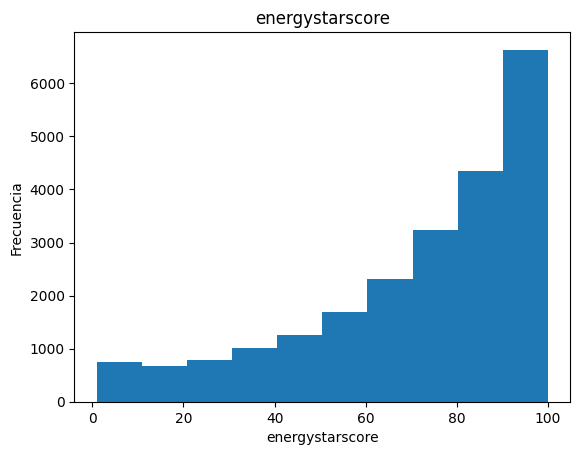

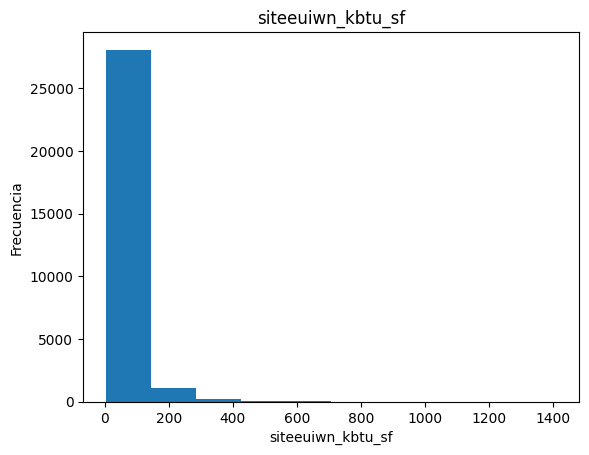

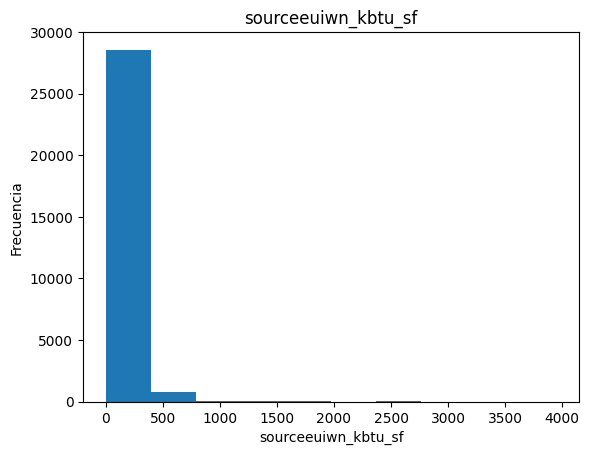

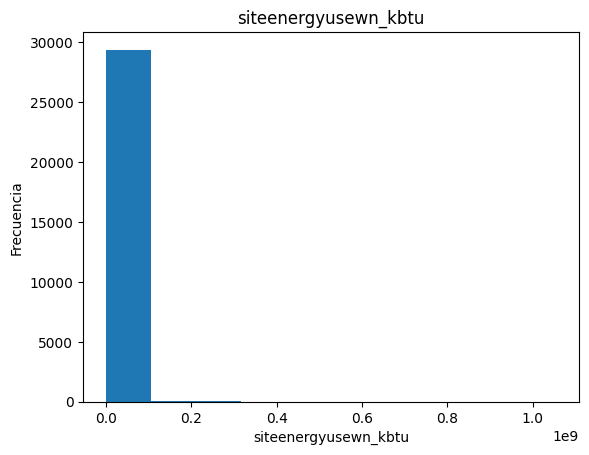

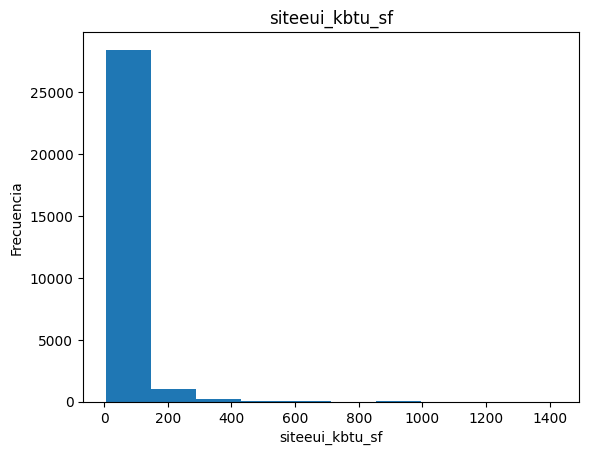

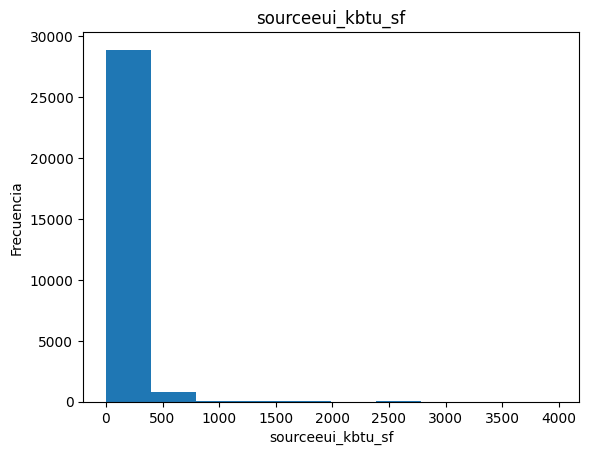

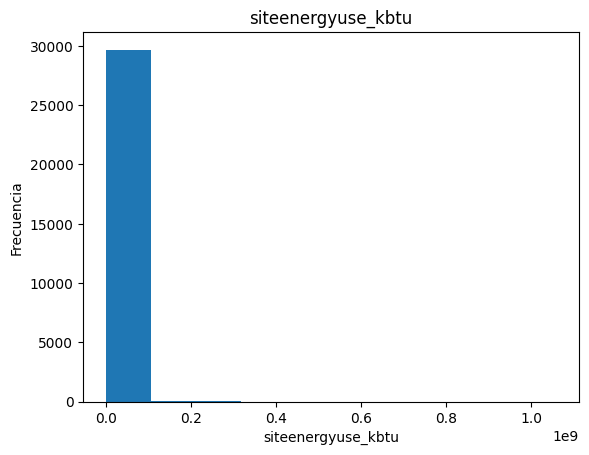

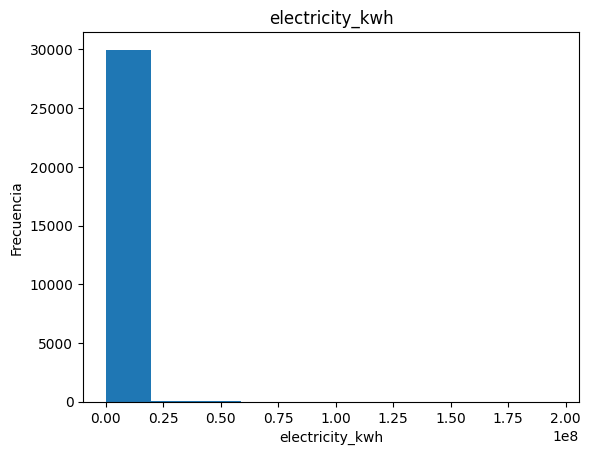

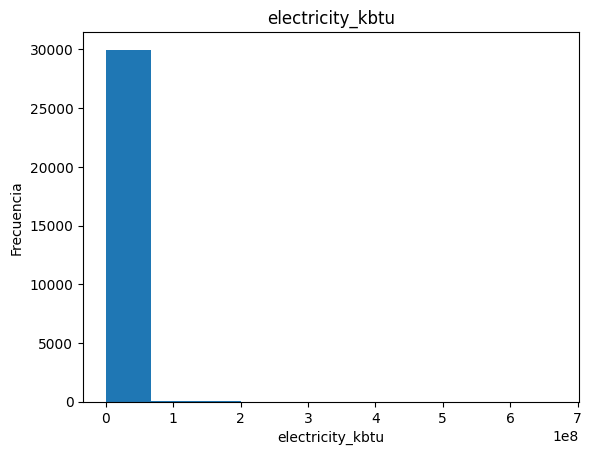

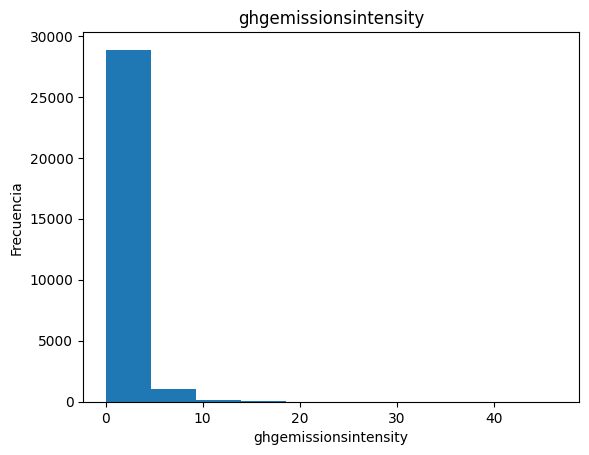

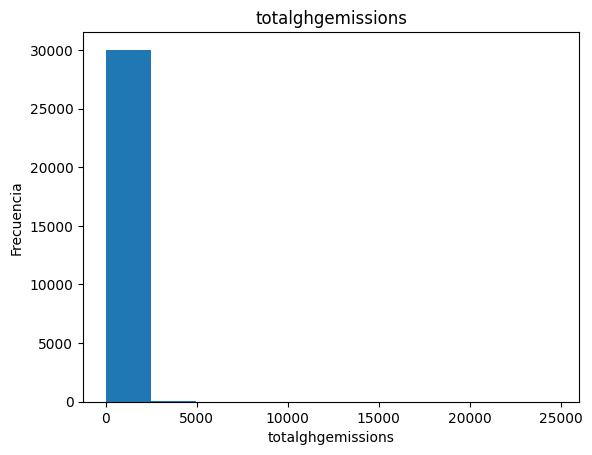

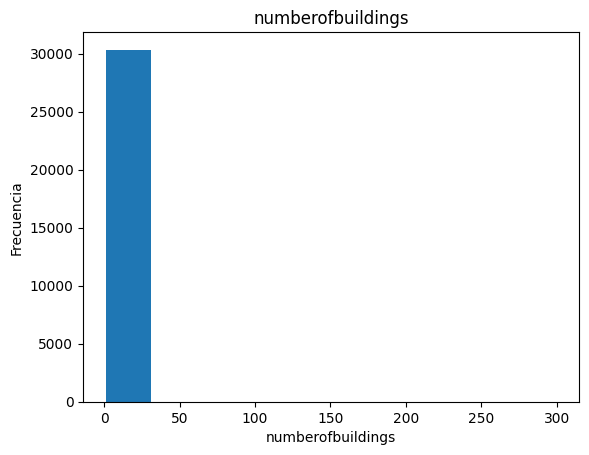

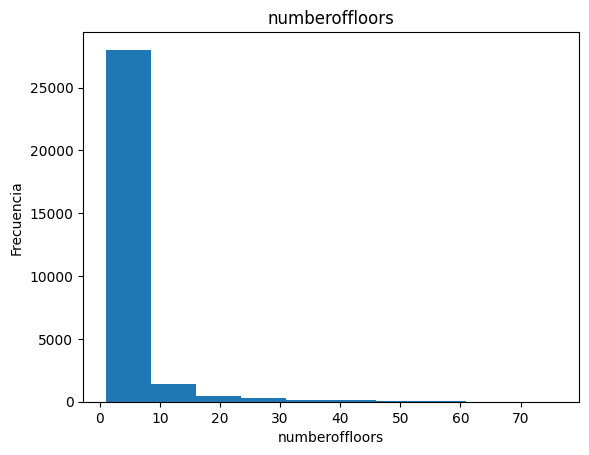

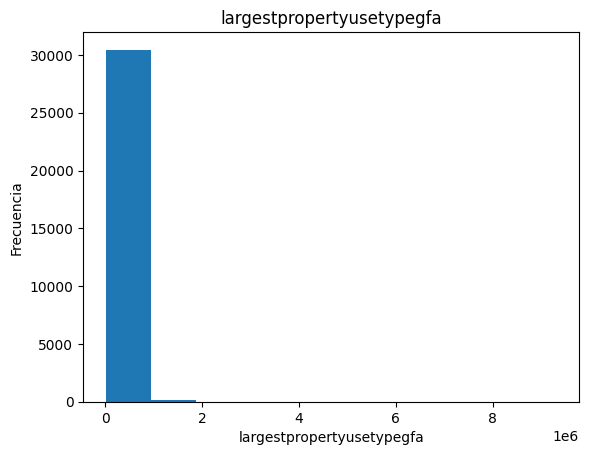

In [25]:
treshold = 0
series_nulos = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

for col in series_nulos[series_nulos>treshold].index:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()


In [26]:
input_columns = [col for col in series_nulos[series_nulos>treshold].index if pd.api.types.is_numeric_dtype(df[col])]
input_columns
    

['energystarscore',
 'siteeuiwn_kbtu_sf',
 'sourceeuiwn_kbtu_sf',
 'siteenergyusewn_kbtu',
 'siteeui_kbtu_sf',
 'sourceeui_kbtu_sf',
 'siteenergyuse_kbtu',
 'electricity_kwh',
 'electricity_kbtu',
 'ghgemissionsintensity',
 'totalghgemissions',
 'numberofbuildings',
 'numberoffloors',
 'largestpropertyusetypegfa']

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[input_columns] = imputer.fit_transform(df[input_columns])

In [28]:
df.isnull().sum()

osebuildingid                      0
datayear                           0
buildingname                       0
buildingtype                       0
taxparcelidentificationnumber      0
address                            0
city                               0
state                              0
zipcode                            0
latitude                           0
longitude                          0
neighborhood                       0
councildistrictcode                0
yearbuilt                          0
numberoffloors                     0
numberofbuildings                  0
propertygfatotal                   0
propertygfabuildings               0
propertygfaparking                 0
selfreportgfatotal                 0
selfreportgfabuildings             0
selfreportparking                  0
energystarscore                    0
siteeuiwn_kbtu_sf                  0
siteeui_kbtu_sf                    0
siteenergyuse_kbtu                 0
siteenergyusewn_kbtu               0
s

In [29]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

complianceissue                  1.063379
largestpropertyusetype           0.153309
epapropertytype                  0.127214
buildingtype                     0.000000
osebuildingid                    0.000000
datayear                         0.000000
buildingname                     0.000000
city                             0.000000
address                          0.000000
taxparcelidentificationnumber    0.000000
state                            0.000000
neighborhood                     0.000000
zipcode                          0.000000
latitude                         0.000000
longitude                        0.000000
numberofbuildings                0.000000
propertygfatotal                 0.000000
propertygfabuildings             0.000000
propertygfaparking               0.000000
selfreportgfatotal               0.000000
councildistrictcode              0.000000
yearbuilt                        0.000000
numberoffloors                   0.000000
energystarscore                  0

In [30]:
df = df.dropna(subset=['complianceissue', 'largestpropertyusetype', 'epapropertytype'])


In [31]:
df.isnull().sum().sum()

np.int64(0)

In [32]:
df

osebuildingid  datayear                    buildingname  \
0                  1      2023            MAYFLOWER PARK HOTEL   
1                  2      2023                 PARAMOUNT HOTEL   
2                  3      2023  WESTIN HOTEL (Parent Building)   
3                  5      2023                       HOTEL MAX   
4                  8      2023           WARWICK SEATTLE HOTEL   
...              ...       ...                             ...   
30652          50038      2015   Salmon Bay Marine Center West   
30653          50049      2015      PACIFIC CENTER CONDOMINIUM   
30654          50055      2015              IDENTITY APTS 4123   
30655          50057      2015                          CIRRUS   
30656          50219      2015       Garfield Community Center   

               buildingtype taxparcelidentificationnumber  \
0            NonResidential                     659000030   
1            NonResidential                     659000220   
2            NonResidential                     659000475   
3            NonResidential                     659000640   
4            NonResidential                     659000970   
...                     ...                           ...   
30652        NonResidential                    2771605298   
30653  Multifamily LR (1-4)                    6599950000   
30654  Multifamily MR (5-9)                    1142001670   
30655  Multifamily HR (10+)                     660000575   
30656    Nonresidential COS                    7544800245   

                    address     city state  zipcode  latitude  ...  \
0             405 OLIVE WAY  SEATTLE    WA    98101  47.61220  ...   
1               724 PINE ST  SEATTLE    WA    98101  47.61307  ...   
2              1900 5TH AVE  SEATTLE    WA    98101  47.61367  ...   
3            620 STEWART ST  SEATTLE    WA    98101  47.61412  ...   
4             401 LENORA ST  SEATTLE    WA    98121  47.61375  ...   
...                     ...      ...   ...      ...       ...  ...   
30652  2360 W COMMODORE WAY  SEATTLE    WA    98199  47.66144  ...   
30653        321 10TH AVE S  SEATTLE    WA    98104  47.59980  ...   
30654      4123 12TH AVE NE  SEATTLE    WA    98105  47.65756  ...   
30655          2030 8TH AVE  SEATTLE    WA    98121  47.61652  ...   
30656      2323 E CHERRY ST  SEATTLE    WA    98122  47.60775  ...   

            epapropertytype largestpropertyusetype  largestpropertyusetypegfa  \
0                     Hotel                  Hotel                    88434.0   
1                     Hotel                  Hotel                    88502.0   
2                     Hotel                  Hotel                   827566.0   
3                     Hotel                  Hotel                    61320.0   
4                     Hotel                  Hotel                   123445.0   
...                     ...                    ...                        ...   
30652    Mixed Use Property                 Office                    11745.0   
30653  Multifamily LR (1-4)    Multifamily Housing                    44650.0   
30654  Multifamily MR (5-9)    Multifamily Housing                    31748.0   
30655  Multifamily HR (10+)    Multifamily Housing                   414026.0   
30656    Other - Recreation     Other - Recreation                    20050.0   

       electricity_kwh  compliancestatus  complianceissue  electricity_kbtu  \
0            1047120.0         Compliant         No Issue         3572773.0   
1             786237.0         Compliant         No Issue         2682640.0   
2           11121130.0         Compliant         No Issue        37945296.0   
3             780180.0         Compliant         No Issue         2661973.0   
4            1401668.0         Compliant         No Issue         4782491.0   
...                ...               ...              ...               ...   
30652         184235.0         Compliant         No Issue          628609.0   
30653         334979.0         Comp

In [43]:
for col in df.select_dtypes(include=['object']).columns:
    print('----'*45)
    print(df[col].value_counts())
    print('\n')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingname
WAREHOUSE                                   70
OFFICE BUILDING                             54
BRENTWOOD SQUARE APTS                       27
CANAL PL OFFICE PARK                        27
APARTMENTS                                  27
                                            ..
SEATTLE LUTHERAN HIGH SCHOOL                 1
UW - KINCAID HALL                            1
401 ELLIOTT WEST                             1
VAN ASSELT BLDG RENOVATED (SPS-DISTRICT)     1
TEATRO ZINZANNI-demo'd                       1
Name: count, Length: 3715, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingtype
NonResidential          11970
Multifamily LR (1-4)   

#### **Revision problemas en columnas**
- `buildingname`: Representa el nombre de la propiedad por lo que no tiene valor para el modelado.
- `buildingtype`: Existen 8 distintas clasificaciones. Hay tres no residenciales (NonResidential, Nonresidential COS y Nonresidential WA)
- `taxparcelidentificationnumber`: Son los pin de identificación de las parcelas la que no aportan información relevante
- `address` por si sola no tiene un valor para nuestro objetivo.
- `city`: El dataset viene de seattle asi que esta columna es redundante
- `state`: Al igual que la ciudad no aporta mas información que esta en el estado de washington.
- `neighborhood`: Aporta información y tiene problema con algunos de sus datos en especial porque aparecen en formato .title y otros en formato Upper.
- `epapropertytype`: Posee 69 clasificaciones diferentes por lo que se necesita mirar de manera más `detenida`.
- `largestpropertyusetype`: Es similar a epapropertytype pero difiere de esta en cantidad y tambien en la nomenclatura. Una de estas dos debe ser eliminada porque son muy similares
- `compliancestatus`: No hay problemas con esta columna
- `ComplianceIssue`: No se hay categorias que parezcan tener problemas

### Conclusion

_**Columnas a eliminar:**_ `buildingname`, `taxparcelidentificationnumber`, `address`,  `city`, `state`

_**Columnas a revisar mas en profundidad:**_ : `buildingtype`, `neighborhood`, `epapropertytype`, `largestpropertyusetype`


_**Columnas sin necesidad de revisar:**_ :`compliancestatus` y `ComplianceIssue`


### Eliminando columnas

In [44]:
df.drop(columns=['buildingname', 'taxparcelidentificationnumber', 'address', 'city', 'state'], inplace=True)

### Convirtiendo todos los datos de textos a title

In [45]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.title()

## Revisando columnas [`buildingtype`, `neighborhood`, `epapropertytype`, `largestpropertyusetype`]

In [47]:
columnas_a_revisar = ['buildingtype', 'neighborhood', 'epapropertytype', 'largestpropertyusetype']

df[columnas_a_revisar]

buildingtype           neighborhood       epapropertytype  \
0            Nonresidential               Downtown                 Hotel   
1            Nonresidential               Downtown                 Hotel   
2            Nonresidential               Downtown                 Hotel   
3            Nonresidential               Downtown                 Hotel   
4            Nonresidential               Downtown                 Hotel   
...                     ...                    ...                   ...   
30652        Nonresidential  Magnolia / Queen Anne    Mixed Use Property   
30653  Multifamily Lr (1-4)               Downtown  Multifamily Lr (1-4)   
30654  Multifamily Mr (5-9)              Northeast  Multifamily Mr (5-9)   
30655  Multifamily Hr (10+)               Downtown  Multifamily Hr (10+)   
30656    Nonresidential Cos                Central    Other - Recreation   

      largestpropertyusetype  
0                      Hotel  
1                      Hotel  
2                      Hotel  
3                      Hotel  
4                      Hotel  
...                      ...  
30652                 Office  
30653    Multifamily Housing  
30654    Multifamily Housing  
30655    Multifamily Housing  
30656     Other - Recreation  

[30284 rows x 4 columns]

In [ ]:
df[columnas_a_revisar[0]].value_counts()

buildingtype
Nonresidential          11970
Multifamily Lr (1-4)     9302
Multifamily Mr (5-9)     6026
Multifamily Hr (10+)     1106
Sps-District K-12         812
Nonresidential Cos        550
Campus                    386
Nonresidential Wa         132
Name: count, dtype: int64

In [54]:
df[columnas_a_revisar[0]] = np.where(
    df[columnas_a_revisar[0]].isin(['Nonresidential Cos', 'Nonresidential Wa']),
    'Nonresidential',
    df[columnas_a_revisar[0]]
)

In [55]:
df[columnas_a_revisar[0]].value_counts()

buildingtype
Nonresidential          12652
Multifamily Lr (1-4)     9302
Multifamily Mr (5-9)     6026
Multifamily Hr (10+)     1106
Sps-District K-12         812
Campus                    386
Name: count, dtype: int64

In [56]:
df[columnas_a_revisar[1]].value_counts()

neighborhood
Downtown                  5129
East                      4113
Magnolia / Queen Anne     3855
Greater Duwamish          3091
Northeast                 2541
Lake Union                2502
Northwest                 2284
Southwest                 1490
North                     1290
Central                   1215
Ballard                   1197
Southeast                  860
Delridge Neighborhoods     717
Name: count, dtype: int64

In [62]:
df[columnas_a_revisar[-2:]].sample(50)

epapropertytype  \
29618                   Multifamily Lr (1-4)   
8611                    Multifamily Lr (1-4)   
12951                   Multifamily Lr (1-4)   
14170                   Multifamily Lr (1-4)   
7856                    Multifamily Mr (5-9)   
29030                   Multifamily Lr (1-4)   
23857                    Multifamily Housing   
22568             Non-Refrigerated Warehouse   
16742                   Multifamily Lr (1-4)   
12424                                 Office   
29916                     Mixed Use Property   
7732                              Laboratory   
13621            Other - Lodging/Residential   
14833                  Self-Storage Facility   
2074                      Other - Recreation   
19245                   Multifamily Lr (1-4)   
9866                    Multifamily Lr (1-4)   
9065             Other - Lodging/Residential   
10880             Non-Refrigerated Warehouse   
19101                   Multifamily Hr (10+)   
7821                    Multifamily Lr (1-4)   
4189                                  Office   
29814                   Multifamily Mr (5-9)   
8469                            Food Service   
14795                    Distribution Center   
24406                           Retail Store   
15783                   Multifamily Mr (5-9)   
4680                    Multifamily Hr (10+)   
17944                                 Office   
4347                                  Office   
29530                   Multifamily Lr (1-4)   
10799                            K-12 School   
15095                   Multifamily Lr (1-4)   
14708                     Mixed Use Property   
8112                    Multifamily Mr (5-9)   
15067                   Multifamily Hr (10+)   
19836                   Multifamily Mr (5-9)   
24609                                 Office   
29089  Hospital (General Medical & Surgical)   
2303                    Multifamily Mr (5-9)   
26271             Non-Refrigerated Warehouse   
5061                                   Other   
10955                                 Office   
13980                   Multifamily Mr (5-9)   
14806                                 Office   
25783                                 Office   
153                     Multifamily Lr (1-4)   
26941                   Multifamily Lr (1-4)   
1587                    Multifamily Lr (1-4)   
5681              Non-Refrigerated Warehouse   

                      largestpropertyusetype  
29618                    Multifamily Housing  
8611                     Multifamily Housing  
12951                    Multifamily Housing  
14170                    Multifamily Housing  
7856                     Multifamily Housing  
29030                    Multifamily Housing  
23857                    Multifamily Housing  
22568             Non-Refrigerated Warehouse  
16742                    Multifamily Housing  
12424                                 Office  
29916                                 Office  
7732                              Laboratory  
13621            Other - Lodging/Residential  
14833                  Self-Storage Facility  
2074                      Other - Recreation  
19245                    Multifamily Housing  
9866                     Multifamily Housing  
9065             Other - Lodging/Residential  
10880             Non-Refrigerated Warehouse  
19101                    Multifamily Housing  
7821                     Multifamily Housing  
4189                                  Office  
29814                    Multifamily Housing  
8469                            Food Service  
14795                    Distribution Center  
24406                           Retail Store  
15783                    Multifamily Housing  
4680                     Multifamily Housing  
17944                                 Office  
4347                                  Office  
29530                    Multifamily Housing  
10799                            K-12 School  
15095                    Mult

Las columnas son muy similares y tienen casi la misma información pero `epapropertytype` es más estandarizada (viene del sistema Portfolio Manager de EPA).

Por lo tanto ocuparemos `epapropertytype`

In [63]:
df.drop(columns=columnas_a_revisar[-1], inplace=True)

In [ ]:
df[]

osebuildingid  datayear          buildingtype  zipcode  latitude  \
0                  1      2023        Nonresidential    98101  47.61220   
1                  2      2023        Nonresidential    98101  47.61307   
2                  3      2023        Nonresidential    98101  47.61367   
3                  5      2023        Nonresidential    98101  47.61412   
4                  8      2023        Nonresidential    98121  47.61375   
...              ...       ...                   ...      ...       ...   
30652          50038      2015        Nonresidential    98199  47.66144   
30653          50049      2015  Multifamily Lr (1-4)    98104  47.59980   
30654          50055      2015  Multifamily Mr (5-9)    98105  47.65756   
30655          50057      2015  Multifamily Hr (10+)    98121  47.61652   
30656          50219      2015        Nonresidential    98122  47.60775   

       longitude           neighborhood  councildistrictcode  yearbuilt  \
0     -122.33799               Downtown                    7       1927   
1     -122.33361               Downtown                    7       1996   
2     -122.33822               Downtown                    7       1969   
3     -122.33664               Downtown                    7       1926   
4     -122.34047               Downtown                    7       1980   
...          ...                    ...                  ...        ...   
30652 -122.38723  Magnolia / Queen Anne                    6       2014   
30653 -122.32034               Downtown                    2       2000   
30654 -122.31584              Northeast                    4       2014   
30655 -122.33735               Downtown                    7       2015   
30656 -122.30225                Central                    3       1994   

       numberoffloors  ...  sourceeui_kbtu_sf       epapropertytype  \
0                12.0  ...         170.199997                 Hotel   
1                11.0  ...         130.600006                 Hotel   
2                41.0  ...         165.699997                 Hotel   
3                10.0  ...         165.300003                 Hotel   
4                18.0  ...         177.300003                 Hotel   
...               ...  ...                ...                   ...   
30652             2.0  ...          84.000000    Mixed Use Property   
30653             4.0  ...          80.400002  Multifamily Lr (1-4)   
30654             7.0  ...         124.199997  Multifamily Mr (5-9)   
30655            40.0  ...          93.099998  Multifamily Hr (10+)   
30656             1.0  ...         129.500000    Other - Recreation   

       largestpropertyusetypegfa  electricity_kwh  compliancestatus  \
0                        88434.0        1047120.0         Compliant   
1                        88502.0         786237.0         Compliant   
2                       827566.0       11121130.0         Compliant   
3                        61320.0         780180.0         Compliant   
4                       123445.0        1401668.0         Compliant   
...                          ...              ...               ...   
30652                    11745.0         184235.0         Compliant   
30653                    44650.0         334979.0         Compliant   
30654                    31748.0         325705.0         Compliant   
30655                   414026.0        1690364.0         Compliant   
30656                    20050.0         164509.0         Compliant   

       complianceissue  electricity_kbtu  totalghgemissions  \
0             No Issue         3572773.0              332.1   
1             No Issue         2682640.0              220.0   
2             No Issue        37945296.0             2192.8   
3             No Issue         2661973.0              176.1   
4             No Issue         4782491.0              456.6   
...                ...               ...                ...   
30652         No Issue          628609.0                3.

### Revision integridad columnas numericas

In [106]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
df[numeric_cols].describe().T.round(2)

count        mean          std       min  \
osebuildingid              30284.0    22782.40     13445.90      1.00   
datayear                   30284.0     2019.13         2.58   2015.00   
zipcode                    30284.0    98116.51        16.72  98101.00   
latitude                   30284.0       47.62         0.05     47.50   
longitude                  30284.0     -122.33         0.03   -122.41   
councildistrictcode        30284.0        4.22         2.24      1.00   
yearbuilt                  30284.0     1972.04        33.96   1900.00   
numberoffloors             30284.0        5.02         5.64      1.00   
numberofbuildings          30284.0        1.24         5.42      1.00   
propertygfatotal           30284.0   103688.14    213771.00  20000.00   
propertygfabuildings       30284.0    87938.91    188450.16  11111.00   
propertygfaparking         30284.0    15749.23     46237.23      0.00   
selfreportgfatotal         30284.0   105451.83    217073.80      0.00   
selfreportgfabuildings     30284.0    87954.65    188276.36      0.00   
selfreportparking          30284.0    17497.18     49042.21      0.00   
energystarscore            30284.0       73.88        22.42      1.00   
siteeuiwn_kbtu_sf          30284.0       52.75        53.03      3.50   
siteeui_kbtu_sf            30284.0       52.17        52.98      5.00   
siteenergyuse_kbtu         30284.0  5260204.64  18147215.33  86686.00   
siteenergyusewn_kbtu       30284.0  5221677.16  17400327.15  91736.00   
sourceeuiwn_kbtu_sf        30284.0      119.18       119.17     -2.10   
sourceeui_kbtu_sf          30284.0      118.30       119.62     -2.00   
largestpropertyusetypegfa  30284.0    82205.11    151061.56   5656.00   
electricity_kwh            30284.0  1030659.83   3341440.00      0.00   
electricity_kbtu           30284.0  3516571.53  11401003.45      0.00   
totalghgemissions          30284.0      120.46       571.94      0.20   
ghgemissionsintensity      30284.0        1.18         1.79      0.01   
calculated_eui             30284.0       38.92        51.30      0.00   
prueba                     30284.0       38.92        51.30      0.00   

                                 25%         50%         75%           max  
osebuildingid               20188.00    23419.50    26558.00  5.095600e+04  
datayear                     2017.00     2019.00     2021.00  2.023000e+03  
zipcode                     98105.00    98112.00    98122.00  9.819900e+04  
latitude                       47.60       47.62       47.66  4.773000e+01  
longitude                    -122.35     -122.33     -122.32 -1.222600e+02  
councildistrictcode             2.00        4.00        7.00  7.000000e+00  
yearbuilt                    1952.00     1979.00     2000.00  2.022000e+03  
numberoffloors                  3.00        4.00        6.00  7.600000e+01  
numberofbuildings               1.00        1.00        1.00  3.000000e+02  
propertygfatotal            29380.00    46527.00    97855.00  1.521647e+07  
propertygfabuildings        27480.00    43330.00    87315.00  1.521647e+07  
propertygfaparking              0.00        0.00     9298.00  6.867500e+05  
selfreportgfatotal          29400.00    47332.00   101337.00  1.521647e+07  
selfreportgfabuildings      27272.00    43162.00    87864.00  1.521647e+07  
selfreportparking               0.00        0.00    12000.00  7.867710e+05  
energystarscore                67.00       80.00       88.00  1.000000e+02  
siteeuiwn_kbtu_sf              28.60       38.00       57.60  1.411500e+03  
siteeui_kbtu_sf                28.00       37.40       56.70  1.421900e+03  
siteenergyuse_kbtu         974233.00  1866283.00  4202950.00  1.059039e+09  
siteenergyusewn_kbtu       995720.00  1890081.00  4191497.50  1.055418e+09  
sourceeuiwn_kbtu_sf            71.30       90.10      124.50  3.952300e+03  
sourceeui_kbtu_sf              70.20       88.70      123.60  3.981300e+03  
largestpropertyusetypegfa   25880.00    41289.50    81204.00  9.320

`osebuildingid`: Representa el identificador unico de cada edificacion que en nuestro caso es irrelevante

`datayear`: Los años de los datos van desde el 2015 al 2023.

`zipcode`: Representa el codigo postal de la zona pero considerando que estos datos no son bien usados en la actualizad y tenemos información de longitud y latitud seria mejor eliminarlos.

`latitude` y `longitu`: No parecen tener problemas.

`councildistrictcode`: Tambien habla de la ubicacion en un distrito especifico lo que quizas puede ser reduntante o no considerando la latitud y longitud

`yearbuilt`: Todos los edificios tienen sus años de construcción que van desde  1900 y 2023 con un promedio de construcción de 1972

`numberoffloors`: No hay datos raros ya que los pisos van de 1 a 6 con promedio de pisos de 5 pisos.

`numberofbuildings`: Tambien se ve consistente la columna ya que en general las propiedades tienen solo 1 edificio formando parte de la propiedad y como maximo 3 edificios.


